**POWER CONSUMPTION PREDICTION IN TETOUAN CITY MOROCCO**


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import dates as md
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import graphviz

In the modern world where Power Consumption (PC) plays a critical role in a global economy due to the imbalance between energy production and demand. We aim to use Machine Learning and Deep Learning to predict the power consumption of three power zones. Machine Learning and Deep Learning models have been widely used in PC predictions to help energy managers to control power systems better and improve energy usage. In our project, we used LSTMs (Neural Networks), Decision Trees, and Random Forests and Boosting algorithms in order to achieve predictions.



**Pre-processing**: 

1. Found a dataset on UCI Machine Learning repository and imported it [LINK](https://raw.githubusercontent.com/younesidhamou/Power_Consumption_Prediction/main/Data/Tetuan%20City%20power%20consumption.csv)
2. Converted and broke down ‘Datetime’ column (time series index) into - hours, minutes, quarter, day of week, day of month, day of year and month (time series features).
3. Plotted correlation matrix, boxplots and scatterplots (data visualization) to understand feature importance.

In [ ]:
# Import Data
data = pd.read_csv("https://raw.githubusercontent.com/younesidhamou/Power_Consumption_Prediction/main/Data/Tetuan%20City%20power%20consumption.csv")
data.head()
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Transforming DateTime column into index
data = data.set_index('DateTime')
data.index = pd.to_datetime(data.index)

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
data = create_features(data)

# Display Data
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52


# Graphs to Visualize Data

CORRELATION MATRIX

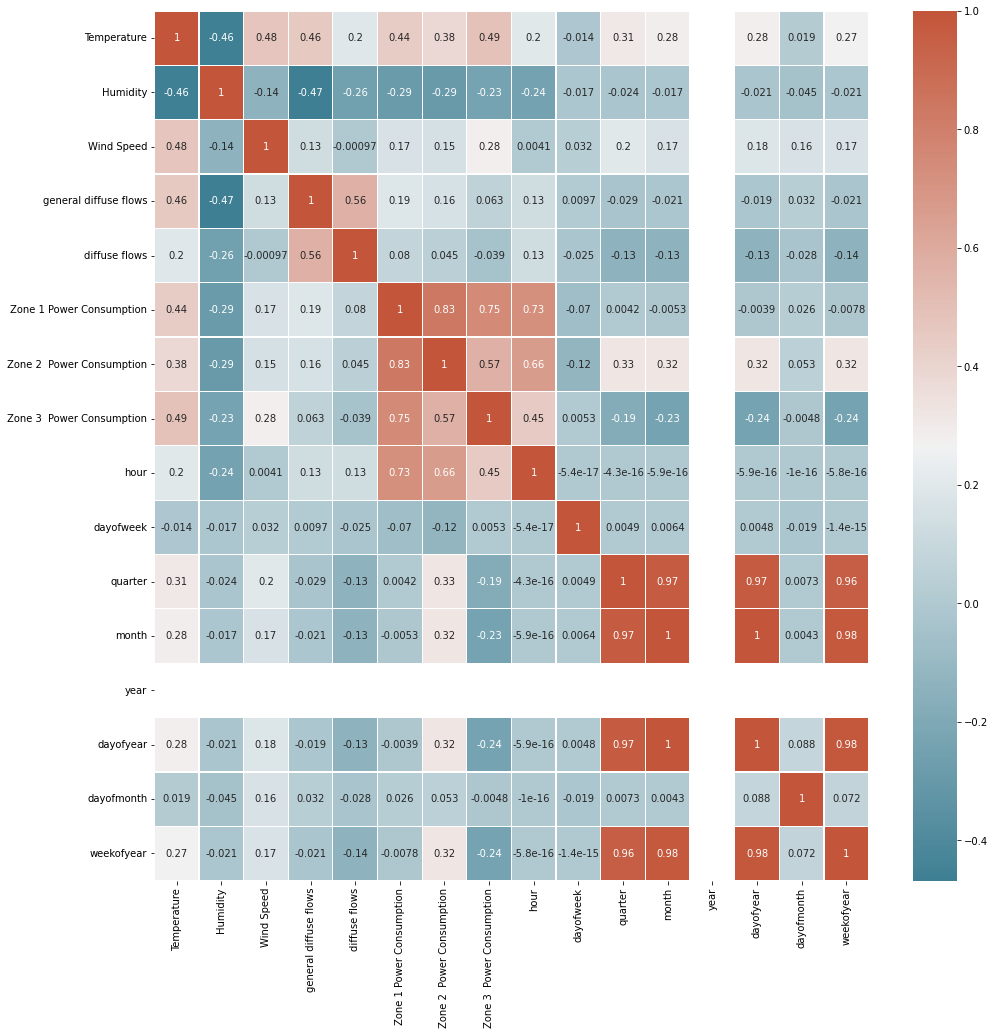

In [ ]:
# calculate correlation matrix
df = pd.DataFrame(data)
corr = df.corr()
# plot the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

BOXPLOTS

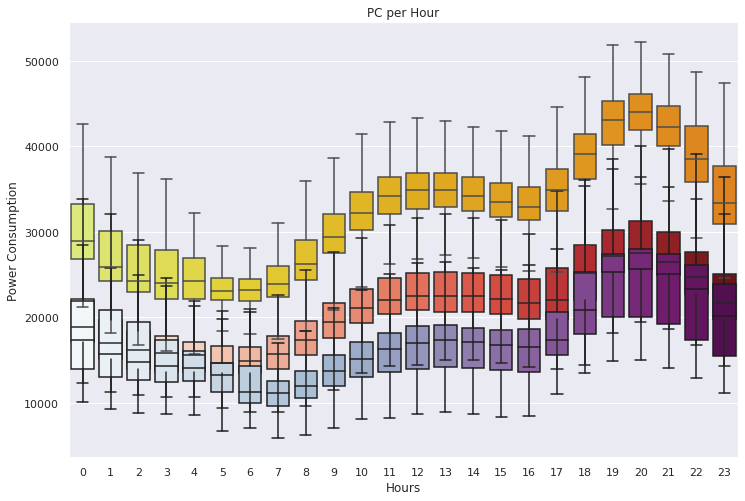

In [ ]:
# Power Consumption per Hour Boxplot

sns.set(rc={"figure.figsize":(12, 8)}) 

sns.boxplot(x="hour", y="Zone 1 Power Consumption",
            data=data, palette="Wistia", showfliers = False)
sns.boxplot(x="hour", y="Zone 2  Power Consumption",
            data=data, palette="Reds", showfliers = False)
bp= sns.boxplot(x="hour", y="Zone 3  Power Consumption",
            data=data, palette="BuPu", showfliers = False)

bp.set(xlabel ="Hours", ylabel = "Power Consumption", title ='PC per Hour')
print("\n")

# Uptick doing work hours and highest during evening hours

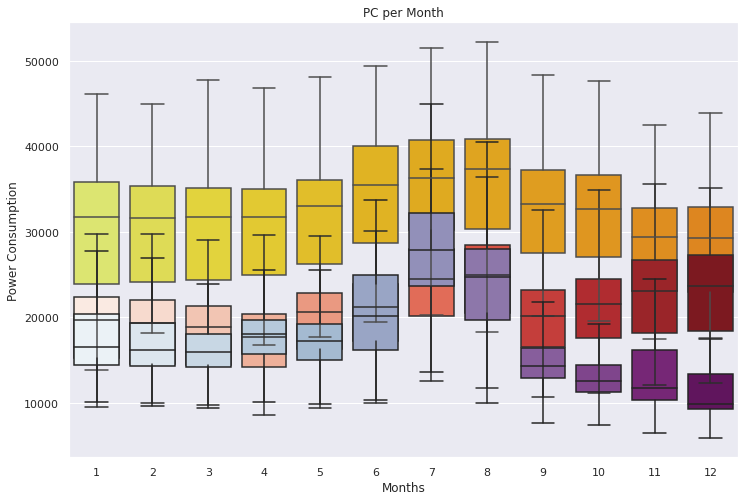

In [ ]:
# Power Consumption per Month Boxplot

sns.set(rc={"figure.figsize":(12,8)}) 

sns.boxplot(x="month", y="Zone 1 Power Consumption",
            data=data, palette="Wistia", showfliers = False)
sns.boxplot(x="month", y="Zone 2  Power Consumption",
            data=data, palette="Reds", showfliers = False)
bp= sns.boxplot(x="month", y="Zone 3  Power Consumption",
            data=data, palette="BuPu", showfliers = False)

bp.set(xlabel ="Months", ylabel = "Power Consumption", title ='PC per Month')
print("\n")

# Highest during dry summer months

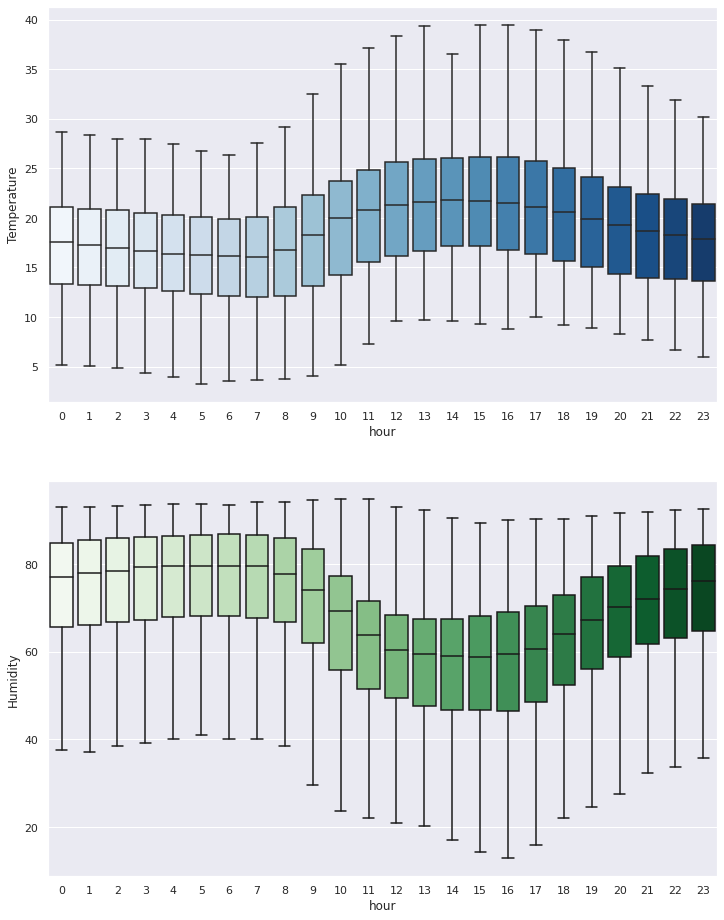

In [ ]:
# Humidity and Temperature per Hour
sns.set(rc={"figure.figsize":(12, 16)}) 
fig, axes = plt.subplots(2,1)
sns.boxplot(x="hour", y="Temperature",
            data=data, palette="Blues", showfliers = False, ax=axes[0])
sns.boxplot(x="hour", y="Humidity",
            data=data, palette="Greens", showfliers = False, ax=axes[1])

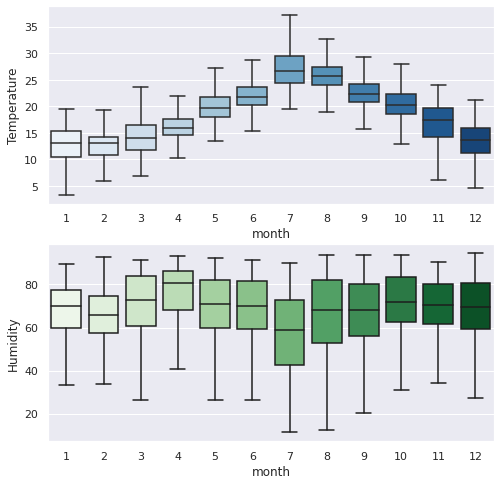

In [ ]:
# Humidity and Temperature per Month Boxplots
sns.set(rc={"figure.figsize":(8, 8)}) 
fig, axes = plt.subplots(2,1)
sns.boxplot(x="month", y="Temperature",
            data=data, palette="Blues", showfliers = False, ax=axes[0])
sns.boxplot(x="month", y="Humidity",
            data=data, palette="Greens", showfliers = False, ax=axes[1])

PAIRPLOTS

We wanted to visually see how the data correllated to each zone to gauge feature importance

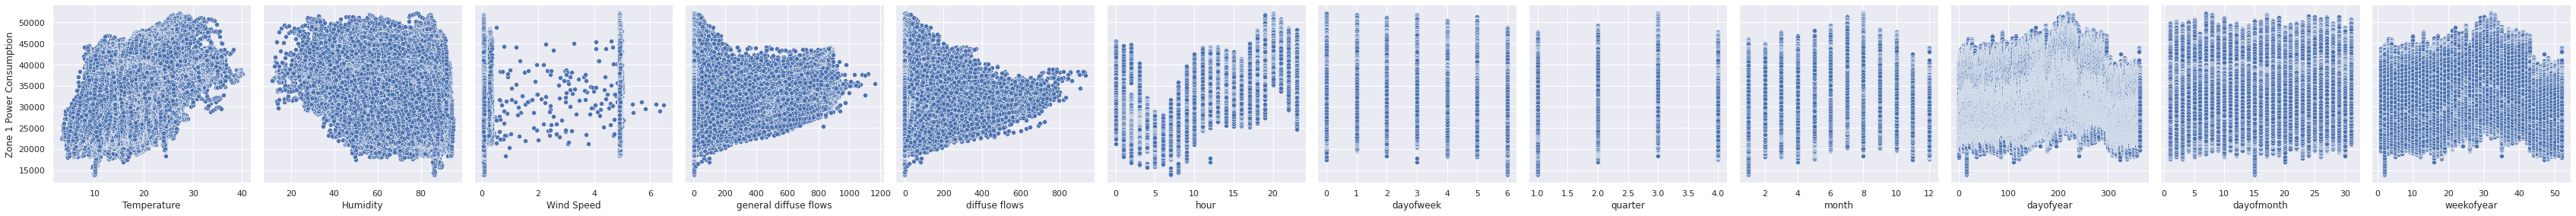

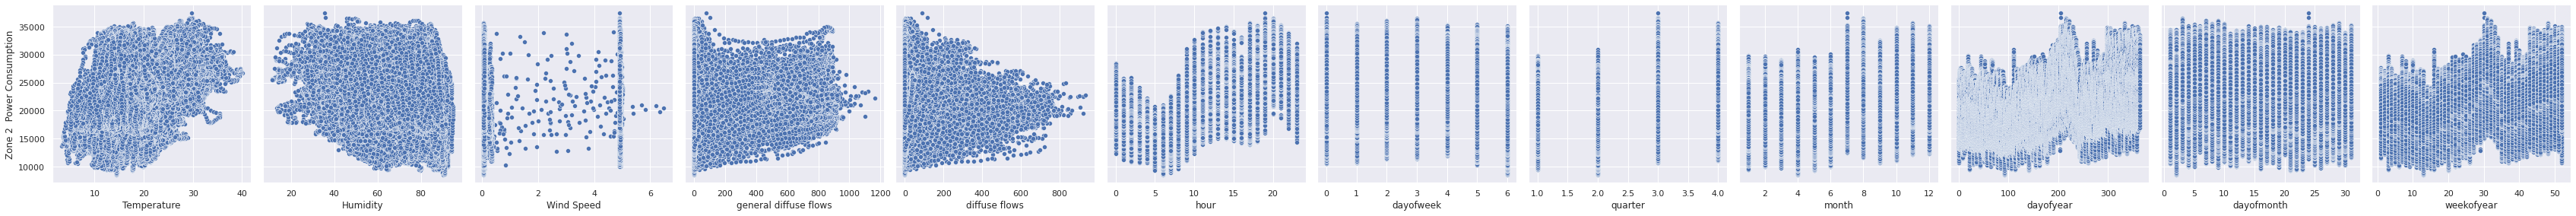

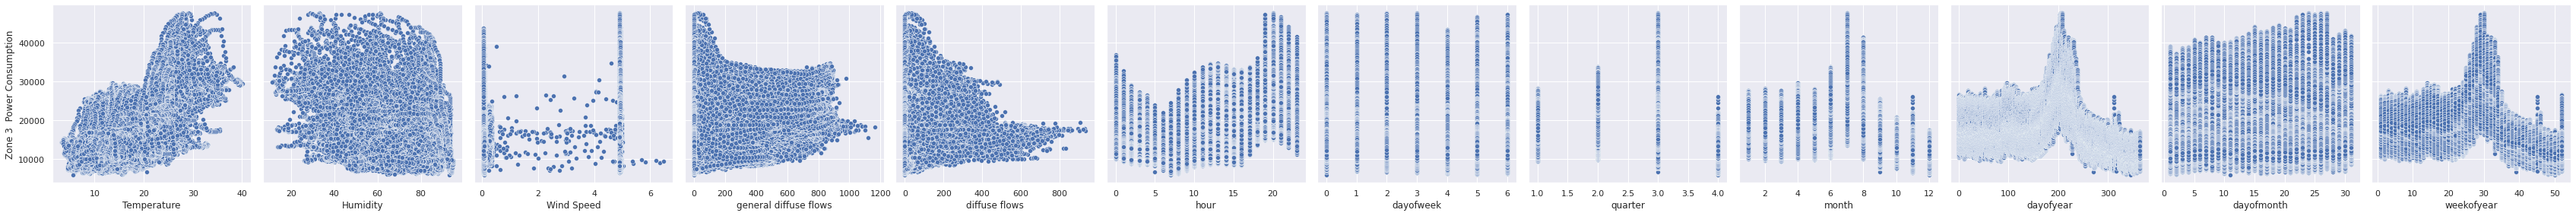

In [ ]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, 
             x_vars=["Temperature", 
            "Humidity", 
            "Wind Speed",	
            "general diffuse flows",
            "diffuse flows",
            "hour",
            "dayofweek",
            "quarter",
            "month",
            "dayofyear",
            "dayofmonth",
            "weekofyear"], 
             y_vars='Zone 1 Power Consumption', height=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(data, 
             x_vars=["Temperature", 
            "Humidity", 
            "Wind Speed",	
            "general diffuse flows",
            "diffuse flows",
            "hour",
            "dayofweek",
            "quarter",
            "month",
            "dayofyear",
            "dayofmonth",
            "weekofyear"], 
             y_vars='Zone 2  Power Consumption', height=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(data, 
             x_vars=["Temperature", 
            "Humidity", 
            "Wind Speed",	
            "general diffuse flows",
            "diffuse flows",
            "hour",
            "dayofweek",
            "quarter",
            "month",
            "dayofyear",
            "dayofmonth",
            "weekofyear"], 
             y_vars='Zone 3  Power Consumption', height=4, aspect=1, kind='scatter')
plt.show()

# '''
# Based on plots - 
#    Temp has a semi positive correlation
#    Humiditidy has a very slight negative correlation for lower PC values
#    Month, dayofyear, and weekofyear, (and quarter) follow the same trend of higher PC in the summer 
#               with dayofyear having the highest correlation (as expected - since it has more values)
#    Hour follows a similar trend to dayofyear with PC increasing in the evening hours
#    Wind Speed, dayofmonth, dayofweek have no sort of correlation at all
#    Diffuse flows seem to be more correlated than general diffuse flows but neither seem substantial
#    All 3 Zones follow similar patterns.
# ''' 


# Decision Trees

We then used decision trees to better gauge feature importance in another way

|                       |   Importance |
|:----------------------|-------------:|
| hour                  |  0.746       |
| Temperature           |  0.0846832   |
| dayofyear             |  0.0790533   |
| general diffuse flows |  0.0223096   |
| weekofyear            |  0.0193769   |
| dayofweek             |  0.0151399   |
| diffuse flows         |  0.0124189   |
| dayofmonth            |  0.00775489  |
| Humidity              |  0.00687285  |
| Wind Speed            |  0.00396639  |
| month                 |  0.00212599  |
| quarter               |  0.000298302 |
| year                  |  0           |


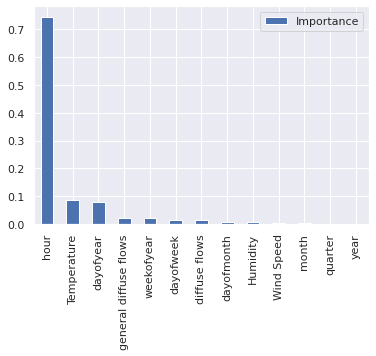

In [ ]:
features = ["Temperature", 
            "Humidity", 
            "Wind Speed",	
            "general diffuse flows",
            "diffuse flows",
            "hour",
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear"]

# Zone 1 Mean Squared Error
Z1_mse = tree.DecisionTreeRegressor(
    criterion="squared_error",
    # max_depth=4,
)

Z1_mse.fit(data[features], y=data["Zone 1 Power Consumption"])
feat_importances = pd.DataFrame(Z1_mse.feature_importances_, index=data[features].columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(6,4))
print(feat_importances.to_markdown())


|                       |   Importance |
|:----------------------|-------------:|
| hour                  |  0.585931    |
| dayofyear             |  0.248002    |
| general diffuse flows |  0.0596174   |
| dayofweek             |  0.0395198   |
| weekofyear            |  0.01945     |
| Temperature           |  0.0164475   |
| dayofmonth            |  0.0113648   |
| Humidity              |  0.0088333   |
| Wind Speed            |  0.005522    |
| diffuse flows         |  0.00409294  |
| month                 |  0.00106346  |
| quarter               |  0.000155605 |
| year                  |  0           |


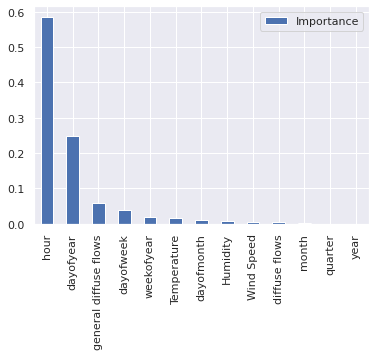

In [ ]:
# Zone 2 Mean Squared Error
Z2_mse = tree.DecisionTreeRegressor(
    criterion="squared_error",
    # max_depth=4,
)

Z2_mse.fit(data[features], y=data["Zone 2  Power Consumption"])
feat_importances = pd.DataFrame(Z2_mse.feature_importances_, index=data[features].columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(6,4))
print(feat_importances.to_markdown())


|                       |   Importance |
|:----------------------|-------------:|
| dayofyear             |  0.389697    |
| hour                  |  0.357623    |
| Temperature           |  0.192745    |
| weekofyear            |  0.0178583   |
| general diffuse flows |  0.0176658   |
| dayofmonth            |  0.00905553  |
| month                 |  0.00497324  |
| Humidity              |  0.00377095  |
| diffuse flows         |  0.00275384  |
| dayofweek             |  0.0017909   |
| Wind Speed            |  0.00173782  |
| quarter               |  0.000328815 |
| year                  |  0           |


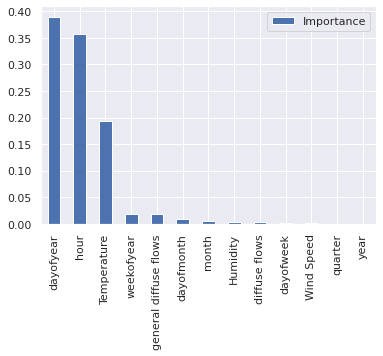

In [ ]:
# Zone 3 Mean Squared Error
Z3_mse = tree.DecisionTreeRegressor(
    criterion="squared_error",
    # max_depth=4,
)

Z3_mse.fit(data[features], y=data["Zone 3  Power Consumption"])
feat_importances = pd.DataFrame(Z3_mse.feature_importances_, index=data[features].columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(6,4))
print(feat_importances.to_markdown())

Train and Test Sets with Decision Trees

In [ ]:
# Shuffling the data to avoid bias of summer vs winter months (more AC/heat == more PC)
shuffled = data.sample(frac=1).reset_index()

Zone 1

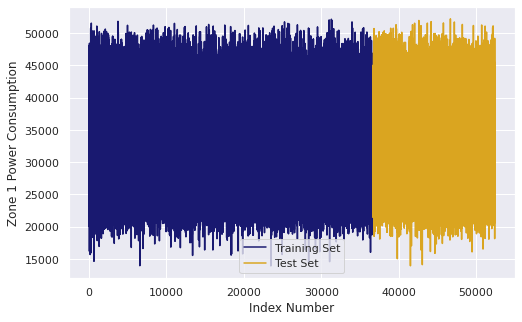

In [ ]:
#ZONE 1 TRAIN AND TEST

# Defining Test and Train Sets with a 70/30 split
# day of year, week of year, and month are all directly correlated so only choose one
X_train1 = shuffled.loc[:"36692",['Temperature','dayofyear', 'hour', 'general diffuse flows', "Humidity"]] 
y_train1 = shuffled.loc[:"36692", ['Zone 1 Power Consumption']]
X_test1 = shuffled.loc["36692":,['Temperature','dayofyear', 'hour', 'general diffuse flows', "Humidity"]] 
y_test1 = shuffled.loc["36692":, ['Zone 1 Power Consumption']]

# Visualizing Training and Testing Set
sns.set(rc={"figure.figsize":(8, 5)}) 
fig,ax=plt.subplots()
ax.plot(X_train1.index, y_train1['Zone 1 Power Consumption'], color = "Midnightblue")
ax.plot(X_test1.index, y_test1['Zone 1 Power Consumption'], color = "Goldenrod")
ax.set_xlabel("Index Number")
ax.set_ylabel("Zone 1 Power Consumption")
plt.legend(['Training Set', 'Test Set']);
plt.show()


In [ ]:
rt = DecisionTreeRegressor(criterion = "squared_error", max_depth=5)
model = rt.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)

dot_data = tree.export_graphviz(rt, 
                                feature_names=list(X_train1), 
                                class_names=("Zone 1 Power Consumption"), 
                                filled=True,
                                rounded=True)

# Calculating Error Metrics for Zone 1 with a squared error criterion decision tree
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print("R Squared Score is:", r2_score(y_test1, y_pred1))

#graphviz.Source(dot_data)

Mean Absolute Error: 2034.391539858207
Mean Squared Error: 7379932.573459952
Root Mean Squared Error: 2716.603131386687
R Squared Score is: 0.8539916441087516


In [ ]:
rt = DecisionTreeRegressor(criterion = "absolute_error", max_depth=5)
model = rt.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)

dot_data = tree.export_graphviz(rt, 
                                feature_names=list(X_train1), 
                                class_names=("Zone 1 Power Consumption"), 
                                filled=True,
                                rounded=True)

# Calculating Error Metrics for Zone 1 with an absolute error criterion decision tree
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print("R Squared Score is::", r2_score(y_test1, y_pred1))

#graphviz.Source(dot_data)

Mean Absolute Error: 2004.9550875009538
Mean Squared Error: 7590599.001717273
Root Mean Squared Error: 2755.1041725708437
R Squared Score is:: 0.8498237118783204


Zone 2 

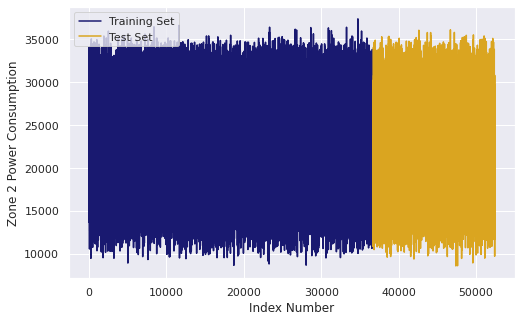

In [ ]:
# ZONE 2 TRAIN AND TEST

# Defining Test and Train Sets with a 70/30 split
X_train2 = shuffled.loc[:"36692",['Temperature','dayofyear', 'hour', 'general diffuse flows']]
y_train2 = shuffled.loc[:"36692", ['Zone 2  Power Consumption']]
X_test2 = shuffled.loc["36692":,['Temperature','dayofyear', 'hour', 'general diffuse flows']]
y_test2 = shuffled.loc["36692":, ['Zone 2  Power Consumption']]

# Visualizing Training and Testing Set
fig,ax=plt.subplots()
ax.plot(X_train2.index, y_train2['Zone 2  Power Consumption'], color = "Midnightblue")
ax.plot(X_test2.index, y_test2['Zone 2  Power Consumption'], color = "Goldenrod")
ax.set_xlabel("Index Number")
ax.set_ylabel("Zone 2 Power Consumption")
plt.legend(['Training Set', 'Test Set']);
plt.show()

In [ ]:
rt = DecisionTreeRegressor(criterion = "squared_error", max_depth=5)
model = rt.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

dot_data = tree.export_graphviz(rt, 
                                feature_names=list(X_train2), 
                                class_names=("Zone 2 Power Consumption"), 
                                filled=True,
                                rounded=True)

# Calculating Error Metrics for Zone 2 with a squared error criterion decision tree
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print("R Squared Score is::", r2_score(y_test2, y_pred2))

# graphviz.Source(dot_data)

Mean Absolute Error: 1688.9710331507572
Mean Squared Error: 4936853.684316627
Root Mean Squared Error: 2221.903167178225
R Squared Score is:: 0.8149911259471281


In [ ]:
rt = DecisionTreeRegressor(criterion = "absolute_error", max_depth=5)
model = rt.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

dot_data = tree.export_graphviz(rt, 
                                feature_names=list(X_train2), 
                                class_names=("Zone 2 Power Consumption"), 
                                filled=True,
                                rounded=True)

# Calculating Error Metrics for Zone 2 with an absolute error criterion decision tree
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print("R Squared Score is::", r2_score(y_test2, y_pred2))

# graphviz.Source(dot_data)

Mean Absolute Error: 1677.6417941532052
Mean Squared Error: 5086866.470242699
Root Mean Squared Error: 2255.4082712987242
R Squared Score is:: 0.8093693882185247


Zone 3

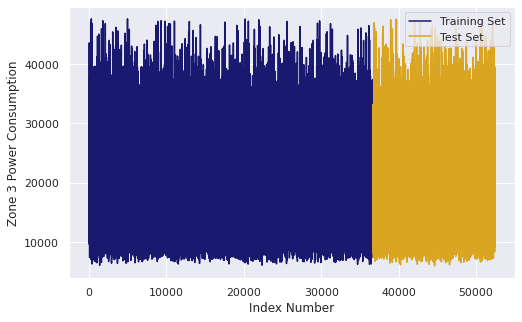

In [ ]:
#ZONE 3 TRAIN AND TEST

# Defining Test and Train Sets with a 70/30 split
X_train3 = shuffled.loc[:"36692",['Temperature','dayofyear', 'hour', 'general diffuse flows', 'Humidity']]
y_train3 = shuffled.loc[:"36692", ['Zone 3  Power Consumption']]
X_test3 = shuffled.loc["36692":,['Temperature','dayofyear', 'hour', 'general diffuse flows', 'Humidity']]
y_test3 = shuffled.loc["36692":, ['Zone 3  Power Consumption']]

# Visualizing Training and Testing Set
fig,ax=plt.subplots()
ax.plot(X_train3.index, y_train3['Zone 3  Power Consumption'], color = "Midnightblue")
ax.plot(X_test3.index, y_test3['Zone 3  Power Consumption'], color = "Goldenrod")
ax.set_xlabel("Index Number")
ax.set_ylabel("Zone 3 Power Consumption")
plt.legend(['Training Set', 'Test Set']);
plt.show()

In [ ]:
rt = DecisionTreeRegressor(criterion = "squared_error", max_depth=5)
model = rt.fit(X_train3, y_train3)
y_pred3 = model.predict(X_test3)

dot_data = tree.export_graphviz(rt, 
                                feature_names=list(X_train3), 
                                class_names=("Zone 3 Power Consumption"), 
                                filled=True,
                                rounded=True)

# Calculating Error Metrics for Zone 3 with a squared error criterion decision tree
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print("R Squared Score is::", r2_score(y_test3, y_pred3))

# graphviz.Source(dot_data)

In [ ]:
rt = DecisionTreeRegressor(criterion = "absolute_error", max_depth=5)
model = rt.fit(X_train3, y_train3)
y_pred3 = model.predict(X_test3)

dot_data = tree.export_graphviz(rt, 
                                feature_names=list(X_train3), 
                                class_names=("Zone 3 Power Consumption"), 
                                filled=True,
                                rounded=True)

# Calculating Error Metrics for Zone 3 with an absolute error criterion decision tree
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print("R Squared Score is::", r2_score(y_test3, y_pred3))


# graphviz.Source(dot_data)

Mean Absolute Error: 1745.9218692238617
Mean Squared Error: 6848987.969499979
Root Mean Squared Error: 2617.05712003005
R Squared Score is:: 0.843567841217196


# Neural Networks

**NEURAL NETWORKS (LSTM): special kind of recurrent neural network that is capable of learning long term dependencies in data**

In [ ]:
X = ["Temperature", "Humidity", "general diffuse flows", "hour", "dayofyear"]
Y1 = data.iloc[ : , 5].values
Y2 = data.iloc[ : , 6].values
Y3 = data.iloc[ : , 7].values

Standardisation of data for LSTMs is an important step

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(data[X])
Y1_scaled = scaler.fit_transform(Y1.reshape(-1, 1))
Y2_scaled = scaler.fit_transform(Y2.reshape(-1, 1))
Y3_scaled = scaler.fit_transform(Y3.reshape(-1, 1))

ZONE 1 POWER CONSUMPTION PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X_scaled, Y1_scaled, test_size=0.2, random_state=0)

LSTMs accept data only in a certain format: 3-D. Hence, we need to reshape it by adding an exrta/dummy column in addition to our X and Y

In [ ]:
X_train_0 = X_train_0.reshape((X_train_0.shape[0], 1, X_train_0.shape[1]))
X_test_0 = X_test_0.reshape((X_test_0.shape[0], 1, X_test_0.shape[1]))
print(X_train_0.shape, Y_train_0.shape, X_test_0.shape, Y_test_0.shape)

(41932, 1, 5) (41932, 1) (10484, 1, 5) (10484, 1)


In [ ]:
X_train_0.shape[1]

1

As is with other NNs, we need to import the LSTM layers from Keras

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from tensorflow.keras.layers import Input

Here, we are using stacked LSTMs (2 layers) to improve the accuracy. We are also including Sigmoid as the activation function to introduce non-linearity in our dataset. Since this dataset is huge, we have taken a large batch size of 256. For observing convergence of loss function, we have taken 50 epochs.

Optimizer: Adam (it is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data)

In [ ]:
model = Sequential()
model.add(Input(shape=(X_train_0.shape[1], X_train_0.shape[2]), dtype='float32'))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
#model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid' ))
model.compile(optimizer = "adam" , loss = 'mae', metrics=['accuracy'])
history = model.fit(X_train_0, Y_train_0, epochs=50, batch_size=256, validation_data=(X_test_0, Y_test_0), verbose=2, shuffle=False)
model.summary()

Epoch 1/50
164/164 - 10s - loss: 0.1080 - accuracy: 2.3848e-05 - val_loss: 0.0889 - val_accuracy: 9.5383e-05 - 10s/epoch - 61ms/step
Epoch 2/50
164/164 - 3s - loss: 0.0875 - accuracy: 2.3848e-05 - val_loss: 0.0859 - val_accuracy: 9.5383e-05 - 3s/epoch - 16ms/step
Epoch 3/50
164/164 - 3s - loss: 0.0858 - accuracy: 2.3848e-05 - val_loss: 0.0844 - val_accuracy: 9.5383e-05 - 3s/epoch - 16ms/step
Epoch 4/50
164/164 - 2s - loss: 0.0845 - accuracy: 2.3848e-05 - val_loss: 0.0832 - val_accuracy: 9.5383e-05 - 2s/epoch - 15ms/step
Epoch 5/50
164/164 - 3s - loss: 0.0835 - accuracy: 2.3848e-05 - val_loss: 0.0822 - val_accuracy: 9.5383e-05 - 3s/epoch - 16ms/step
Epoch 6/50
164/164 - 3s - loss: 0.0826 - accuracy: 2.3848e-05 - val_loss: 0.0811 - val_accuracy: 9.5383e-05 - 3s/epoch - 16ms/step
Epoch 7/50
164/164 - 2s - loss: 0.0815 - accuracy: 2.3848e-05 - val_loss: 0.0801 - val_accuracy: 9.5383e-05 - 2s/epoch - 14ms/step
Epoch 8/50
164/164 - 2s - loss: 0.0805 - accuracy: 2.3848e-05 - val_loss: 0.0791 

As mentioned in the previous code cell, I used 50 epochs to observe the convergence of our loss function

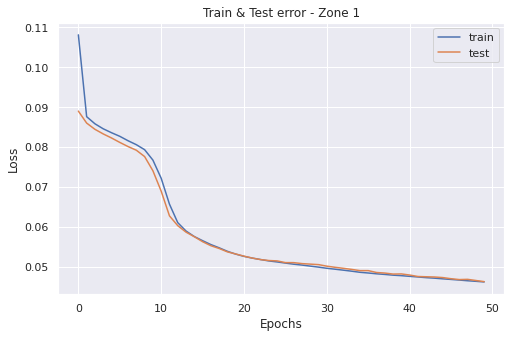

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train & Test error - Zone 1')
plt.legend()
plt.show()

Performing inverse transformation to reverse the effects of standardisation in our original dataset along with reshaping it so that we can do our predictions on the test set

In [ ]:
yhat_1 = model.predict(X_test_0)
yhat_1 = yhat_1.reshape((yhat_1.shape[0], yhat_1.shape[2]))
X_test_0 = X_test_0.reshape((X_test_0.shape[0], X_test_0.shape[2]))
from numpy import concatenate
inv_yhat_1 = concatenate((yhat_1, X_test_0[:, 1:]), axis=1)
inv_yhat_1 = scaler.inverse_transform(inv_yhat_1)
inv_yhat_1 = inv_yhat_1[:, 0]
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_test_0 = Y_test_0.reshape((len(Y_test_0), 1))
inv_y_1 = concatenate((Y_test_0, X_test_0[:, 1:]), axis=1)
inv_y_1 = scaler.inverse_transform(inv_y_1)
inv_y_1 = inv_y_1[:,0]

328/328 [==============================] - 2s 3ms/step


The next few steps have calculations for different error metrics

In [ ]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_1, inv_yhat_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2696.889


In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(inv_y_1, inv_yhat_1))

Mean Absolute Error: 1926.005452133892


In [ ]:
from sklearn.metrics import r2_score
print("R Squared Score is::", r2_score(inv_y_1, inv_yhat_1))

R Squared Score is:: 0.8799051078939826


**REPEATING THE SAME STEPS FOR ALL 3 ZONES**

ZONE 2 POWER CONSUMPTION PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_scaled, Y2_scaled, test_size=0.2, random_state=0)

In [ ]:
X_train_2 = X_train_2.reshape((X_train_2.shape[0], 1, X_train_2.shape[1]))
X_test_2 = X_test_2.reshape((X_test_2.shape[0], 1, X_test_2.shape[1]))
print(X_train_2.shape, Y_train_2.shape, X_test_2.shape, Y_test_2.shape)

(41932, 1, 5) (41932, 1) (10484, 1, 5) (10484, 1)


In [ ]:
model_1 = Sequential()
model_1.add(Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), dtype='float32'))
model_1.add(LSTM(128, return_sequences=True))
model_1.add(LSTM(64, return_sequences=True))
#model.add(Dense(10, activation = 'relu'))
model_1.add(Dense(1, activation = 'sigmoid'))
model_1.compile(optimizer = "adam" , loss = 'mae', metrics=['accuracy'])
history_1 = model_1.fit(X_train_2, Y_train_2, epochs=20, batch_size=256, validation_data=(X_test_2, Y_test_2), verbose=2, shuffle=False)
model_1.summary()

Epoch 1/20
164/164 - 7s - loss: 0.1121 - accuracy: 2.3848e-05 - val_loss: 0.0916 - val_accuracy: 9.5383e-05 - 7s/epoch - 45ms/step
Epoch 2/20
164/164 - 2s - loss: 0.0905 - accuracy: 2.3848e-05 - val_loss: 0.0897 - val_accuracy: 9.5383e-05 - 2s/epoch - 14ms/step
Epoch 3/20
164/164 - 2s - loss: 0.0894 - accuracy: 2.3848e-05 - val_loss: 0.0891 - val_accuracy: 9.5383e-05 - 2s/epoch - 15ms/step
Epoch 4/20
164/164 - 2s - loss: 0.0888 - accuracy: 2.3848e-05 - val_loss: 0.0885 - val_accuracy: 9.5383e-05 - 2s/epoch - 13ms/step
Epoch 5/20
164/164 - 2s - loss: 0.0884 - accuracy: 2.3848e-05 - val_loss: 0.0882 - val_accuracy: 9.5383e-05 - 2s/epoch - 14ms/step
Epoch 6/20
164/164 - 2s - loss: 0.0880 - accuracy: 2.3848e-05 - val_loss: 0.0877 - val_accuracy: 9.5383e-05 - 2s/epoch - 14ms/step
Epoch 7/20
164/164 - 2s - loss: 0.0874 - accuracy: 2.3848e-05 - val_loss: 0.0870 - val_accuracy: 9.5383e-05 - 2s/epoch - 14ms/step
Epoch 8/20
164/164 - 2s - loss: 0.0867 - accuracy: 2.3848e-05 - val_loss: 0.0863 - 

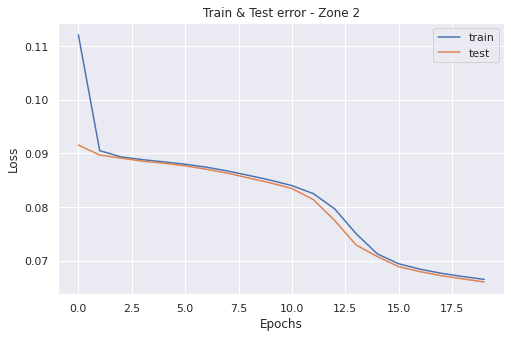

In [ ]:
# plot history
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train & Test error - Zone 2')
plt.legend()
plt.show()

In [ ]:
yhat_2 = model.predict(X_test_2)
yhat_2 = yhat_2.reshape((yhat_2.shape[0], yhat_2.shape[2]))
X_test_2 = X_test_2.reshape((X_test_2.shape[0], X_test_2.shape[2]))
from numpy import concatenate
inv_yhat_2 = concatenate((yhat_2, X_test_2[:, 1:]), axis=1)
inv_yhat_2 = scaler.inverse_transform(inv_yhat_2)
inv_yhat_2 = inv_yhat_2[:, 0]
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_test_2 = Y_test_2.reshape((len(Y_test_2), 1))
inv_y_2 = concatenate((Y_test_2, X_test_2[:, 1:]), axis=1)
inv_y_2 = scaler.inverse_transform(inv_y_2)
inv_y_2 = inv_y_2[:,0]

328/328 [==============================] - 2s 5ms/step


In [ ]:
rmse = sqrt(mean_squared_error(inv_y_2, inv_yhat_2))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5210.091


In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(inv_y_2, inv_yhat_2))

Mean Absolute Error: 4278.018230796153


In [ ]:
from sklearn.metrics import r2_score
print("R Squared Score is::", r2_score(inv_y_2, inv_yhat_2))

R Squared Score is:: 0.5174807993474078


ZONE 3 POWER CONSUMPTION PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_scaled, Y3_scaled, test_size=0.2, random_state=0)

In [ ]:
X_train_3 = X_train_3.reshape((X_train_3.shape[0], 1, X_train_3.shape[1]))
X_test_3 = X_test_3.reshape((X_test_3.shape[0], 1, X_test_3.shape[1]))
print(X_train_3.shape, Y_train_3.shape, X_test_3.shape, Y_test_3.shape)

(41932, 1, 5) (41932, 1) (10484, 1, 5) (10484, 1)


In [ ]:
model_2 = Sequential()
model_2.add(Input(shape=(X_train_3.shape[1], X_train_3.shape[2]), dtype='float32'))
model_2.add(LSTM(256, return_sequences=True))
model_2.add(LSTM(128, return_sequences=True))
#model.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))
model_2.compile(optimizer = "adam" , loss = 'mae', metrics=['accuracy'])
history_2 = model_2.fit(X_train_3, Y_train_3, epochs=20, batch_size=256, validation_data=(X_test_3, Y_test_3), verbose=2, shuffle=False)
model_2.summary()

Epoch 1/20
164/164 - 17s - loss: 0.1147 - accuracy: 2.3848e-05 - val_loss: 0.0827 - val_accuracy: 9.5383e-05 - 17s/epoch - 106ms/step
Epoch 2/20
164/164 - 7s - loss: 0.0759 - accuracy: 2.3848e-05 - val_loss: 0.0722 - val_accuracy: 1.9077e-04 - 7s/epoch - 44ms/step
Epoch 3/20
164/164 - 5s - loss: 0.0716 - accuracy: 2.3848e-05 - val_loss: 0.0701 - val_accuracy: 1.9077e-04 - 5s/epoch - 29ms/step
Epoch 4/20
164/164 - 5s - loss: 0.0694 - accuracy: 2.3848e-05 - val_loss: 0.0677 - val_accuracy: 1.9077e-04 - 5s/epoch - 30ms/step
Epoch 5/20
164/164 - 5s - loss: 0.0672 - accuracy: 2.3848e-05 - val_loss: 0.0653 - val_accuracy: 1.9077e-04 - 5s/epoch - 29ms/step
Epoch 6/20
164/164 - 5s - loss: 0.0648 - accuracy: 2.3848e-05 - val_loss: 0.0632 - val_accuracy: 1.9077e-04 - 5s/epoch - 29ms/step
Epoch 7/20
164/164 - 8s - loss: 0.0625 - accuracy: 2.3848e-05 - val_loss: 0.0609 - val_accuracy: 1.9077e-04 - 8s/epoch - 46ms/step
Epoch 8/20
164/164 - 8s - loss: 0.0605 - accuracy: 2.3848e-05 - val_loss: 0.0597

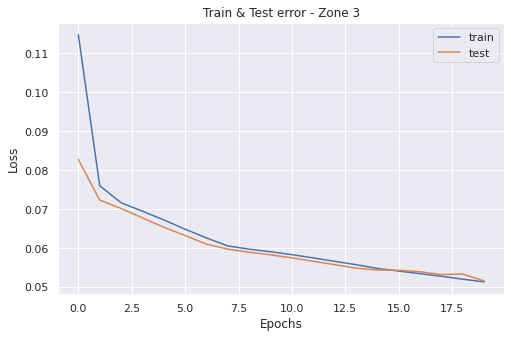

In [ ]:
# plot history
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train & Test error - Zone 3')
plt.legend()
plt.show()

In [ ]:
yhat_3 = model.predict(X_test_3)
yhat_3 = yhat_3.reshape((yhat_3.shape[0], yhat_3.shape[2]))
X_test_3 = X_test_3.reshape((X_test_3.shape[0], X_test_3.shape[2]))
from numpy import concatenate
inv_yhat_3 = concatenate((yhat_3, X_test_3[:, 1:]), axis=1)
inv_yhat_3 = scaler.inverse_transform(inv_yhat_3)
inv_yhat_3 = inv_yhat_3[:, 0]
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_test_3 = Y_test_3.reshape((len(Y_test_3), 1))
inv_y_3 = concatenate((Y_test_3, X_test_3[:, 1:]), axis=1)
inv_y_3 = scaler.inverse_transform(inv_y_3)
inv_y_3 = inv_y_3[:,0]

328/328 [==============================] - 2s 5ms/step


In [ ]:
rmse = sqrt(mean_squared_error(inv_y_3, inv_yhat_3))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9580.410


## Random Forest and Boosting Model

# Random Forest and Boosting Model


Random Forest and Boosting Model


Random forest & Boost model

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
import math

XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model=xgb.XGBRegressor()
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(xgb_model, param_grid, cv=5).fit(X_train1, y_train1)

print("The best hyperparameters are ",search.best_params_)

#xgb_model = xgb.XGBRegressor()
#xgb_model.fit(X_train1, y_train1)

[03:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
#the hyperparameter we want to tuming 
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

Final model after grid search(hyper parameter tuning)

In [ ]:
xgb_model = xgb.XGBRegressor(learning_rate=0.015, n_estimators=1000,
                    silent=True, nthread=1, max_depth=16)
xgb_model.fit(X_train2, y_train2)

XGBRegressor(learning_rate=0.015, max_depth=16, n_estimators=1000, nthread=1,
             silent=True)

In [ ]:

y_pred = xgb_model.predict(X_test2)
y_val = y_test2.to_numpy(dtype="float32").reshape(-1)
print("r2 score: " + str(r2_score(y_val, y_pred)))
MSE = np.square(np.subtract(y_val,y_pred)).mean() 
print("MSE: ", str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", str(RMSE))
xgb_model.score




r2 score: 0.9852342495766219
MSE:  394015.44
Root Mean Square Error: 627.7064899298078


<bound method RegressorMixin.score of XGBRegressor(learning_rate=0.015, max_depth=16, n_estimators=1000, nthread=1,
             silent=True)>

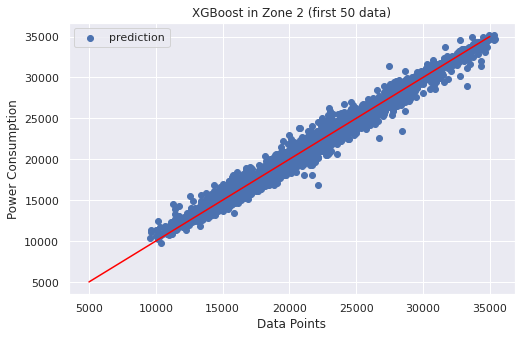

In [ ]:
y_val100 = y_val

#plt.scatter(np.arange(0,5000),y_val100[0:5000], label='target')
plt.scatter(y_val100[0:5000],y_pred[0:5000], label='prediction')
plt.plot(np.arange(5000,35000), np.arange(5000,35000), color='red')
plt.title("XGBoost in Zone 2 (first 50 data)")
plt.xlabel("Data Points")
plt.ylabel("Power Consumption")
plt.legend()

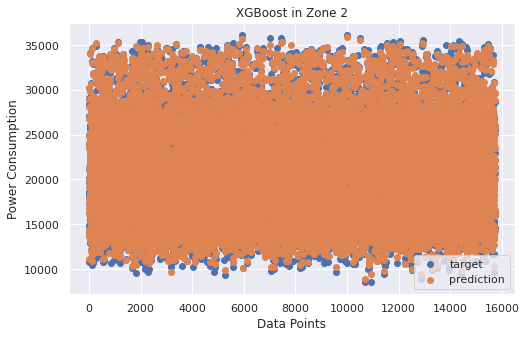

In [ ]:
plt.scatter(np.arange(0,len(y_val100)),y_val100, label='target')
plt.scatter(np.arange(0,len(y_val100)),y_pred, label='prediction')
plt.title("XGBoost in Zone 2")
plt.xlabel("Data Points")
plt.ylabel("Power Consumption")
plt.legend()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators = 1000, oob_score = True,n_jobs = 1,random_state =1)
rfr_model.fit(X_train1, y_train1)


<ipython-input-79-f895736d7450>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train1, y_train1)


RandomForestRegressor(n_estimators=1000, n_jobs=1, oob_score=True,
                      random_state=1)

In [ ]:
y_pred = rfr_model.predict(X_test1)
y_val = y_test1.to_numpy(dtype="float32").reshape(-1)
print("r2 score: " + str(r2_score(y_val, y_pred)))
MSE = np.square(np.subtract(y_val,y_pred)).mean() 
print("MSE: ", str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", str(RMSE))




r2 score: 0.9797234585629151
MSE:  1024869.4864535893
Root Mean Square Error: 1012.3583784676201


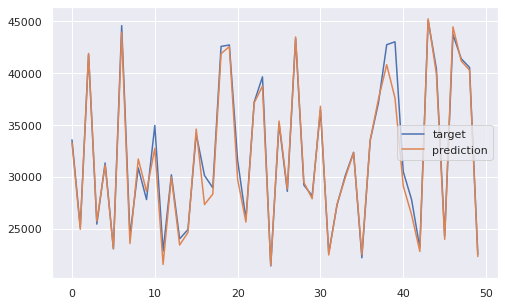

In [ ]:
y_val100 = y_val

plt.plot(y_val100[0:50], label='target')
plt.plot(y_pred[0:50], label='prediction')
plt.legend()


grid search for randomforest model


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train1, y_train1)

In [ ]:
rf_random.best_params_

Light GBM


In [ ]:
import lightgbm as lgb

In [ ]:
lgb_model =  lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=16,
       min_child_samples=0, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=4000, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_model.fit(X_train1, y_train1)

In [ ]:
y_pred = lgb_model.predict(X_test1)
y_val = y_test1.to_numpy(dtype="float32").reshape(-1)
print("r2 score: " + str(r2_score(y_val, y_pred)))
MSE = np.square(np.subtract(y_val,y_pred)).mean() 
print("MSE: ", str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", str(RMSE))


In [ ]:
y_val100 = y_val

plt.plot(y_val100[0:50], label='target')
plt.plot(y_pred[0:50], label='prediction')
plt.legend()

Cat boost


In [ ]:
#!pip install catboost
import catboost

In [ ]:
cat_model = catboost.CatBoostRegressor(loss_function='RMSE',iterations=600,
                          learning_rate=0.5,
                          depth=8, verbose=100)
cat_model.fit(X_train1, y_train1)

In [ ]:
y_pred = cat_model.predict(X_test1)
y_val = y_test1.to_numpy(dtype="float32").reshape(-1)
print("r2 score: " + str(r2_score(y_val, y_pred)))
MSE = np.square(np.subtract(y_val,y_pred)).mean() 
print("MSE: ", str(MSE))
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", str(RMSE))

In [ ]:
y_val100 = y_val

plt.plot(y_val100[0:50], label='target')
plt.plot(y_pred[0:50], label='prediction')
plt.legend()

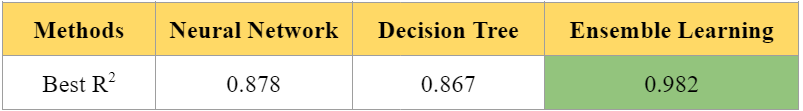

We can tell that Neural Network and Decision Tree provide good R^2; however, Ensemble Learning provides us with an even better performance. 


Boosting algorithms (like XGBoost) are certainly more accurate than deep learning algorithms. We suspect that deep learning works better on homogenous datasets, but since ours is heterogeneous, boosting algorithms perform better as tree-based methods treat features independently of each other and build rules based on the values for those features. For future development, we can work more on detecting overfitting. Next, implementing other architectures like vanilla/bidirectional LSTM and using GRUs also gives us the possibility to improve our model. Furthermore, We can tune the hyper parameters such as criterion and max depth for improvement. Lastly, we can apply k-means algorithms to our model.